In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import math

%matplotlib tk
plt.rcParams["figure.figsize"] = (9,8)

def clamp(x, low, high):
    if x < low:
        return low
    if x > high:
        return high
    return x

def clamp_sym(x, c):
    return clamp(x, -c, c)

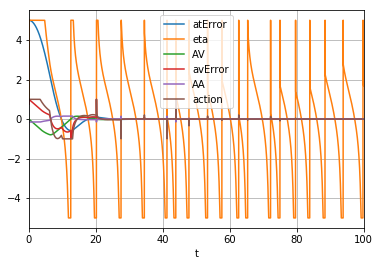

In [2]:
dt = 0.02
maxAA = 0.15
AVcap = 1
AAcap = 0.5
aaNorm = min(AAcap/maxAA, 1)
AAcap = min(AAcap, maxAA)

t = 0
atError = 5
AV = 0
avError = 0
AA = 0

df = pd.DataFrame(columns=['t', 'atError', 'eta', 'AV', 'avError', 'AA', 'action'])

i = 0
while t < 100:
    eta = atError/-AV -dt if AV != 0 else 1
    maxAV = eta * AAcap if eta >= 0 else AVcap
    avError = AV + clamp_sym(atError*maxAV, AVcap)
    action = clamp_sym(avError/AVcap*2, aaNorm)
    AA = -action*maxAA
    AV += AA*dt
    atError += AV*dt
    t += dt
    df.loc[i] = [t, atError, clamp(eta, -5, 5), AV, avError, AA, action]
    i += 1
    
df.set_index('t', drop=True, inplace=True)
ax = df.plot()
ax.grid()

In [17]:
dt = 0.02
maxAA = 0.01
AVcap = 1
AAcap = 0.5
aaNorm = min(AAcap/maxAA, 1)
AAcap = min(AAcap, maxAA)
atError2Action = 3

t = 0
atError = 5
AV = 0
avError = 0
AA = 0
fuel = 0

df = pd.DataFrame(columns=['t', 'atError', 'AV', 'AA', 'action'])

i = 0
while t < 70:
    if AV*atError >= 0:
        action = clamp_sym(atError*atError2Action+AV/AAcap, 1)*aaNorm
    else:
        a_to_stop = AV*AV/2/atError if atError != 0 else 0
        a_to_stop_abs = abs(a_to_stop)
        if a_to_stop_abs > AAcap*(0.99 if abs(action) < 0.01 else 0.9):
            action = -clamp_sym(a_to_stop, AAcap)/maxAA
        elif a_to_stop_abs < AAcap*0.5 and abs(AV) < AVcap:
            action = clamp_sym(atError*atError2Action, 1)*aaNorm
        else:
            action = 0
    AA = -action*maxAA
    AV += AA*dt
    atError += AV*dt
    t += dt
    fuel += dt*abs(action*maxAA)
    df.loc[i] = [t, atError, AV, AA, action]
    i += 1

print(f'Fuel spent: {fuel}')
df.set_index('t', drop=True, inplace=True)
ax = df.plot()
ax.grid()

Fuel spent: 1.157105513274767
